In [85]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import preprocessing
from sklearn.decomposition import PCA


In [86]:
%matplotlib inline

In [87]:
df = pd.read_csv("cereals.csv", na_values = -1).dropna()

In [88]:
df.head(1)
df.set_index("name").head(1)

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
name,,,,,,,,,,,,,,
100%_Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33


In [99]:
pca = PCA(n_components =2)
pca.fit(df.iloc[:, 3:])
reduced_x = pca.transform(df.iloc[:, 3:])

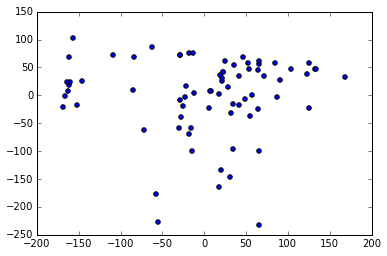

In [90]:
plt.scatter(reduced_x[:, 0], reduced_x[:, 1])

In [128]:
from sklearn.cluster import KMeans

kmeans = KMeans(4)
y_pred = kmeans.fit_predict(reduced_x)

In [129]:
list(zip(reduced_x, y_pred))[:2]

[(array([ -57.44963245, -176.67734453]), 3),
 (array([-151.46081431,  -17.69718159]), 1)]

####I used 3, 4, 5, and 6 clusters but 4 looked like the most natural groupings to my eye.

now, for fun I plugged in 8 and I was supprised at how natural the groupings still looked.  This is an interesting tool.

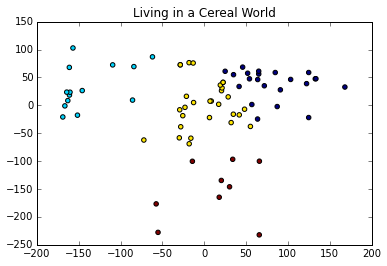

In [130]:
plt.scatter(reduced_x[:, 0], reduced_x[:, 1], c=y_pred, )
plt.title("Living in a Cereal World")
plt.show()